# Гонов М.И. ИУ5-65Б 
# Вариант №4


# Корреляционный анализ набора данных `heart`

В этом ноутбуке мы:
1. Загрузим данные.
2. Проверим и удалим пропуски.
3. Вычислим матрицу корреляций.
4. Построим тепловую карту.
5. Выделим признаки с наибольшим влиянием на целевую переменную.


In [13]:
# 1. Импорт библиотек и загрузка данных
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # для более удобной визуализации, можно заменить на plt.matshow

# Загрузка CSV-файла (предположим, что файл лежит рядом с ноутбуком)
df = pd.read_csv('heart.csv')

# Выведем первые строки
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 2. Проверка пропусков

Проверим, есть ли в датафрейме пропущенные значения. Если они есть, уберём строки с ними.


In [14]:
# Подсчёт пропусков по столбцам
print(df.isnull().sum())

# Удаление строк, содержащих пропуски
df = df.dropna()
print(f"\nРазмер после удаления пропусков: {df.shape}")


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Размер после удаления пропусков: (1025, 14)


## 3. Расчёт матрицы корреляций

Вычислим попарные коэффициенты корреляции Пирсона для всех признаков.


In [15]:
# Матрица корреляций
corr_matrix = df.corr()
corr_matrix


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


## 4. Визуализация тепловой карты

Построим «heatmap» для наглядного анализа сильных и слабых корреляций.


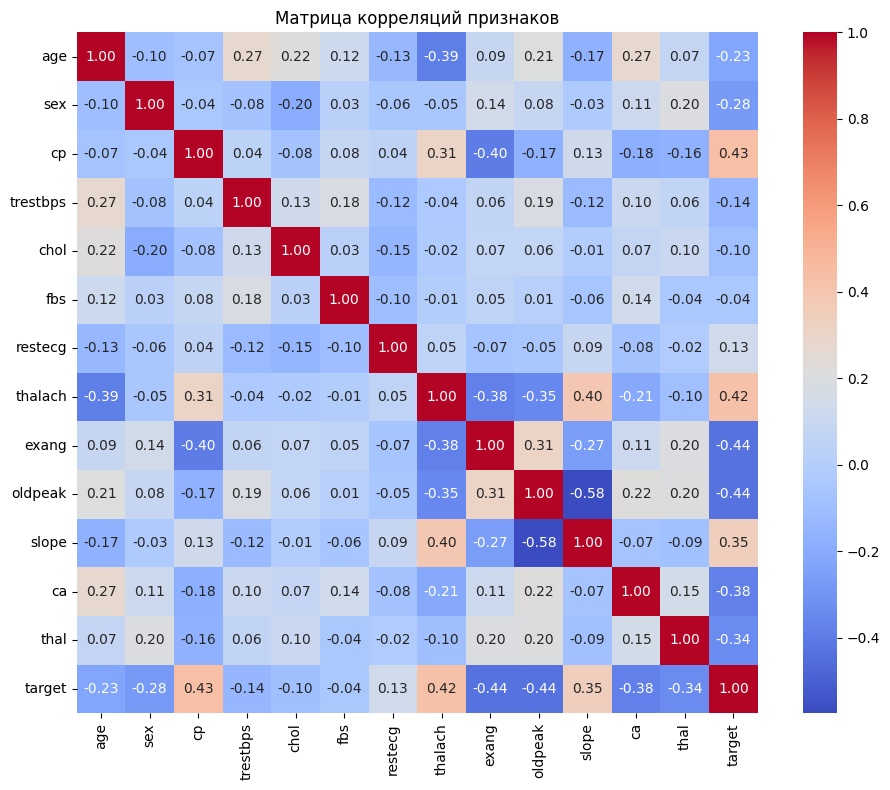

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Матрица корреляций признаков')
plt.tight_layout()
plt.show()


## 5. Выделение наиболее сильных корреляций с целевой переменной

Найдём 5 признаков с наибольшим по абсолютному значению коэффициентом корреляции с `target`.


In [17]:
# Корреляции с целевой переменной
target_corr = corr_matrix['target'].drop('target').abs().sort_values(ascending=False)
top5 = target_corr.head(5)
print("Топ-5 признаков по корреляции с target:")
print(top5)


Топ-5 признаков по корреляции с target:
oldpeak    0.438441
exang      0.438029
cp         0.434854
thalach    0.422895
ca         0.382085
Name: target, dtype: float64


## 7. Парные диаграммы (Pairplot)

Построим матрицу диаграмм рассеяния и распределений для топ-5 признаков и целевой переменной.


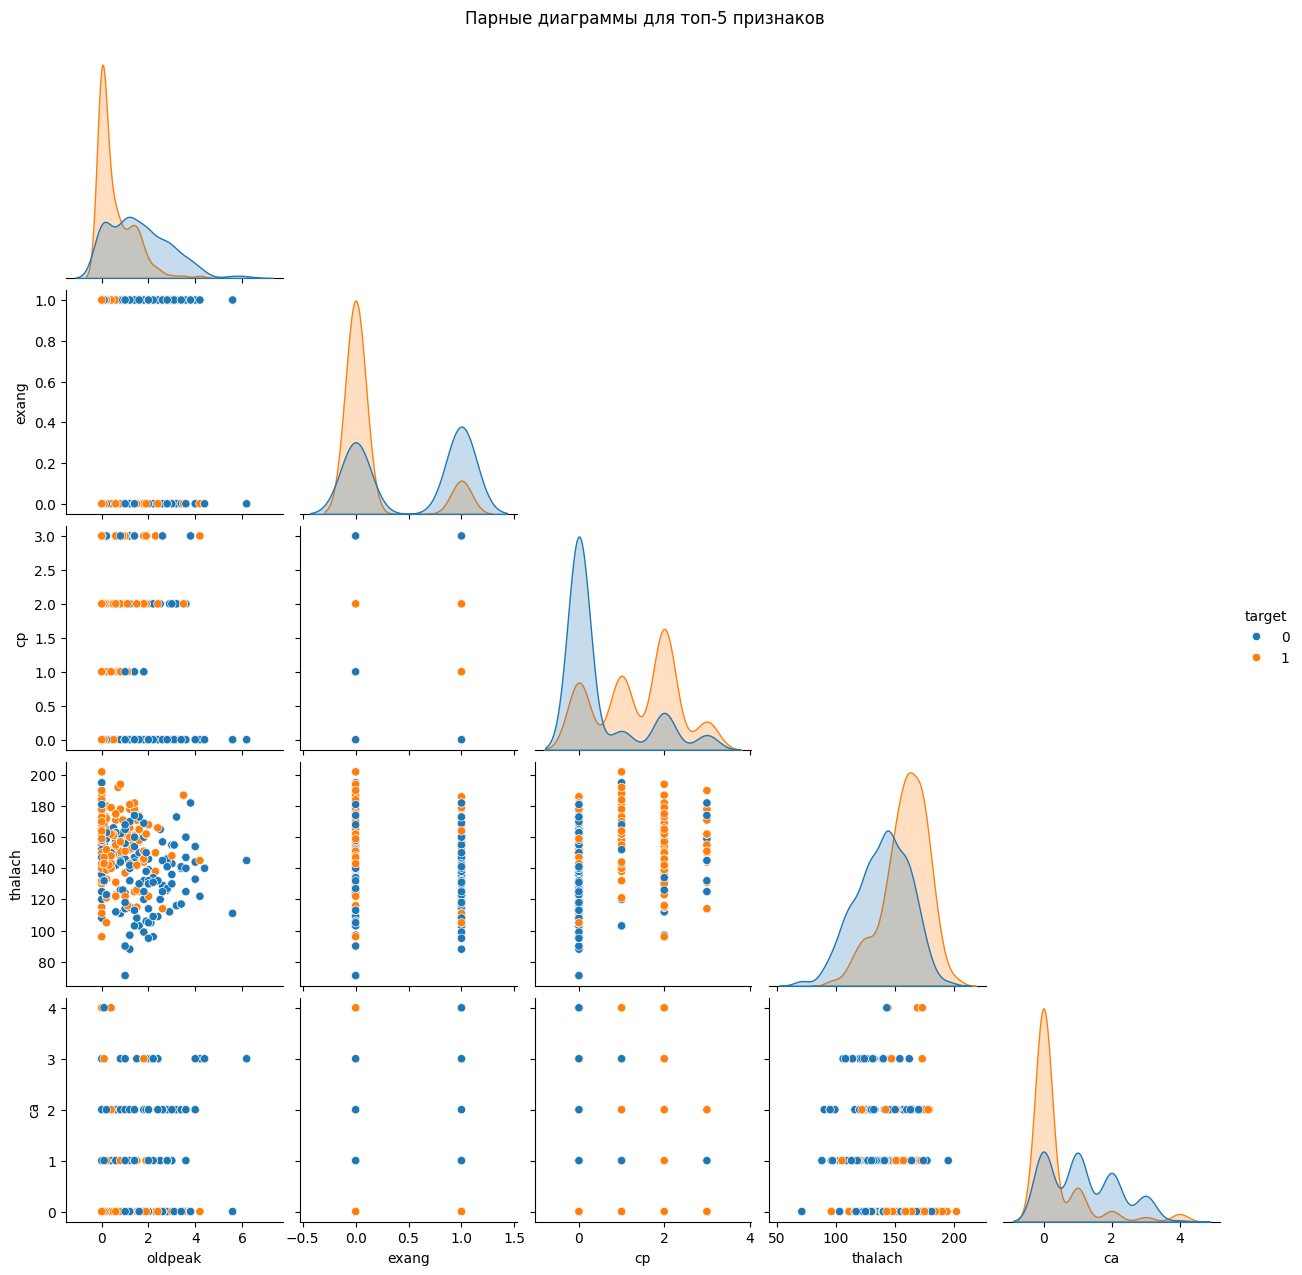

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Предполагаем, что переменная top5 уже вычислена как в разделе 6
features = top5.index.tolist() + ['target']

# Строим pairplot
sns.pairplot(df[features], hue='target', diag_kind='kde', corner=True)
plt.suptitle('Парные диаграммы для топ-5 признаков', y=1.02)
plt.show()


### Итоговые выводы

- Признаки с наибольшей **положительной** корреляцией:  
  `cp`, `thalach`, `slope`  
- Признаки с наибольшей **отрицательной** корреляцией:  
  `exang`, `oldpeak`  

Эти признаки стоит в первую очередь использовать при построении моделей классификации (логистическая регрессия, деревья решений, ансамбли и т.д.).
